### Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów i mnożenia macierzy kwadratowej przez wektor z użyicem operatora "*" 

#### Funkcja do liczenia iloczynu skalarnego wektorów

In [130]:
function _dot(A, B)
    _sum = 0
    for i in eachindex(A)
        _sum = _sum + A[i] * B[i]
    end
    return _sum
end

_dot (generic function with 1 method)

#### Sprawdzenie poprawności dzialania funkcji

In [131]:
_dot([im, im], [1, 1])

0 + 2im

In [132]:
_dot(1:5, 2:6)

70

In [133]:
_dot([2, 7], [2, 3])

25

In [134]:
_dot()

LoadError: [91mMethodError: no method matching _dot()[39m
[91m[0mClosest candidates are:[39m
[91m[0m  _dot([91m::Any[39m, [91m::Any[39m) at In[130]:1[39m

#### Funkcja do mnożenia macierzy kwadratowej przez wektor

In [135]:
function matrix_vector_mul(M, V)
    res = Int32[]
    for i in eachindex(V)
        # i-th row in M matrix
        push!(res, _dot(M[i, :], V))
    end
    return res
end

matrix_vector_mul (generic function with 1 method)

#### Sprawdzenie dzialania funkji

In [136]:
matrix = [1 2; 3 4]
vector = [1 7]
matrix_vector_mul(matrix, vector)

2-element Array{Int32,1}:
 15
 31

In [137]:
matrix = [3 2; 3 4]
vector = [3 7]
matrix_vector_mul(matrix, vector)

2-element Array{Int32,1}:
 23
 37

### Mierzenie czasów działania funkcji

In [138]:
import Pkg; Pkg.add("BenchmarkTools")
using BenchmarkTools

  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


In [139]:
@btime matrix_vector_mul(matrix, vector)

  112.054 ns (4 allocations: 304 bytes)


2-element Array{Int32,1}:
 23
 37

#### Mierzenie czasów obu funkcji

#### @elapsed - macro to evaluate an expression, discarding the resulting value, instead returning the number of seconds it took to execute as a floating-point number | That's what I needed!

In [140]:
dot_times = Array{Float64}(undef, 10, 10)
matrix_vector_times = Array{Float64}(undef, 10, 10)
for _size in 500:500:5000
    for i = 1:10
        dot_times[i, convert(Int64, _size / 500)]  = @elapsed (_dot(rand(1:100, 1, _size), rand(1:100, 1, _size)))
        matrix_vector_times[i, convert(Int64, _size / 500)] =  @elapsed (matrix_vector_mul(rand(1:100, _size, _size), rand(1:100, 1, _size)))
    end
end
dot_times

10×10 Array{Float64,2}:
 3.01e-5  2.72e-5  3.69e-5    4.64e-5    …  8.88e-5    8.34e-5    8.75e-5
 2.11e-5  2.68e-5  3.97e-5    4.43e-5       0.0001329  8.35e-5    8.72e-5
 2.02e-5  2.92e-5  3.58e-5    4.43e-5       7.35e-5    8.21e-5    8.54e-5
 1.92e-5  2.72e-5  3.79e-5    4.53e-5       7.16e-5    0.0001574  8.74e-5
 1.85e-5  2.7e-5   3.61e-5    0.0001055     0.000134   8.23e-5    8.72e-5
 2.03e-5  2.74e-5  3.87e-5    4.29e-5    …  7.65e-5    8.06e-5    8.81e-5
 1.79e-5  2.82e-5  0.0001067  4.41e-5       7.94e-5    8.03e-5    9.52e-5
 1.8e-5   2.95e-5  3.68e-5    4.38e-5       0.0001345  8.32e-5    9.25e-5
 1.84e-5  2.72e-5  3.66e-5    4.75e-5       7.5e-5     8.02e-5    8.82e-5
 1.7e-5   2.63e-5  3.62e-5    0.0001048     7.44e-5    8.01e-5    8.73e-5

In [141]:
dot_times[1, :]

10-element Array{Float64,1}:
 3.01e-5
 2.72e-5
 3.69e-5
 4.64e-5
 5.62e-5
 6.46e-5
 8.85e-5
 8.88e-5
 8.34e-5
 8.75e-5

In [142]:
matrix_vector_times

10×10 Array{Float64,2}:
 0.0028684  0.010598   0.0345509  0.0636815  …  0.42824   0.566698  0.714218
 0.0026309  0.0106548  0.0239162  0.0668187     0.625202  0.573214  0.737456
 0.0026129  0.0190971  0.0347241  0.0708896     0.571743  0.571967  0.744505
 0.0026468  0.010544   0.0241457  0.0724961     0.438724  0.568908  0.748862
 0.0140598  0.0107106  0.0298836  0.0734523     0.436265  0.563958  0.739279
 0.0028346  0.0105869  0.0241409  0.0652263  …  0.430044  0.569204  0.742862
 0.0026927  0.018559   0.0295304  0.0705433     0.434347  0.569685  0.743343
 0.0026188  0.010535   0.0238799  0.0753712     0.436539  0.569585  0.752463
 0.0027263  0.0103642  0.0299408  0.0709973     0.433026  0.570914  0.746837
 0.0025487  0.0103121  0.0242568  0.0716656     0.436887  0.565404  0.744447

In [143]:
Pkg.add("DataFrames")
using DataFrames

  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


In [144]:
### create one_dimensional arrays
_dt = Float64[]
_mv = Float64[]
_sizes = Int64[]
for i = 1:10
    for j = 1:10
        push!(_dt, dot_times[i, j])
        push!(_mv, matrix_vector_times[i, j])
        push!(_sizes, j * 500)
    end
end
_sizes

100-element Array{Int64,1}:
  500
 1000
 1500
 2000
 2500
 3000
 3500
 4000
 4500
 5000
  500
 1000
 1500
    ⋮
 4500
 5000
  500
 1000
 1500
 2000
 2500
 3000
 3500
 4000
 4500
 5000

In [145]:
dot_frame = DataFrame(TYPE = ["D" for i in 1: 100], 
               SIZE = _sizes,
               TIME = _dt
               ) 

,TYPE,SIZE,TIME
,String,Int64,Float64
1,D,500,3.01e-5
2,D,1000,2.72e-5
3,D,1500,3.69e-5
4,D,2000,4.64e-5
5,D,2500,5.62e-5
6,D,3000,6.46e-5
7,D,3500,8.85e-5
8,D,4000,8.88e-5
9,D,4500,8.34e-5


In [146]:
matrix_vector_frame = DataFrame(TYPE = ["MV" for i in 1: 100], 
                                SIZE = _sizes,
                                TIME = _mv
                                ) 

,TYPE,SIZE,TIME
,String,Int64,Float64
1,MV,500,0.0028684
2,MV,1000,0.010598
3,MV,1500,0.0345509
4,MV,2000,0.0636815
5,MV,2500,0.122888
6,MV,3000,0.230507
7,MV,3500,0.33831
8,MV,4000,0.42824
9,MV,4500,0.566698


In [147]:
sum_of_frames = vcat(dot_frame, matrix_vector_frame)

,TYPE,SIZE,TIME
,String,Int64,Float64
1,D,500,3.01e-5
2,D,1000,2.72e-5
3,D,1500,3.69e-5
4,D,2000,4.64e-5
5,D,2500,5.62e-5
6,D,3000,6.46e-5
7,D,3500,8.85e-5
8,D,4000,8.88e-5
9,D,4500,8.34e-5


In [148]:
Pkg.add("CSV")
using CSV

  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


#### zapisanie do jednego pliku CSV

In [149]:
CSV.write("multiplying_time.csv", sum_of_frames)

"multiplying_time.csv"

#### wczytanie danych do jednego dataFrame

In [150]:
df = DataFrame()
df = CSV.read("multiplying_time.csv", DataFrame)

,TYPE,SIZE,TIME
,String,Int64,Float64
1,D,500,3.01e-5
2,D,1000,2.72e-5
3,D,1500,3.69e-5
4,D,2000,4.64e-5
5,D,2500,5.62e-5
6,D,3000,6.46e-5
7,D,3500,8.85e-5
8,D,4000,8.88e-5
9,D,4500,8.34e-5


In [151]:
###licze średnie dla rozmiarów
size_grouped = groupby(df, :SIZE)

,TYPE,SIZE,TIME
,String,Int64,Float64
1,D,500,3.01e-5
2,D,500,2.11e-5
3,D,500,2.02e-5
4,D,500,1.92e-5
5,D,500,1.85e-5
6,D,500,2.03e-5
7,D,500,1.79e-5
8,D,500,1.8e-5
9,D,500,1.84e-5


In [152]:
Pkg.add("Query")
using Query

  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


In [153]:
dot_frame =  filter(row -> row.TYPE in ["D"], df)
dot_size_grouped = groupby(dot_frame, :SIZE)

,TYPE,SIZE,TIME
,String,Int64,Float64
1,D,500,3.01e-5
2,D,500,2.11e-5
3,D,500,2.02e-5
4,D,500,1.92e-5
5,D,500,1.85e-5
6,D,500,2.03e-5
7,D,500,1.79e-5
8,D,500,1.8e-5
9,D,500,1.84e-5


In [154]:
mv_frame =  filter(row -> row.TYPE in ["MV"], df)
mv_size_grouped = groupby(mv_frame, :SIZE)

,TYPE,SIZE,TIME
,String,Int64,Float64
1,MV,500,0.0028684
2,MV,500,0.0026309
3,MV,500,0.0026129
4,MV,500,0.0026468
5,MV,500,0.0140598
6,MV,500,0.0028346
7,MV,500,0.0026927
8,MV,500,0.0026188
9,MV,500,0.0027263


#### Liczenie średnich i odchylen

In [155]:
dot_avrg = combine(dot_size_grouped, :TIME => mean => :mean_time)
dot_std = combine(dot_size_grouped, :TIME => std => :std_time)

,SIZE,std_time
,Int64,Float64
1,500,3.74405e-6
2,1000,1.0403e-6
3,1500,2.20161e-5
4,2000,2.547e-5
5,2500,1.856e-5
6,3000,4.91575e-6
7,3500,2.1734e-5
8,4000,2.78229e-5
9,4500,2.39635e-5


In [156]:
mv_avrg = combine(mv_size_grouped, :TIME => mean => :mean_time)
mv_std = combine(mv_size_grouped, :TIME => std => :std_time)

,SIZE,std_time
,Int64,Float64
1,500,0.00359789
2,1000,0.00349968
3,1500,0.00441073
4,2000,0.00372016
5,2500,0.00933683
6,3000,0.00189577
7,3500,0.00966992
8,4000,0.0704478
9,4500,0.00288125


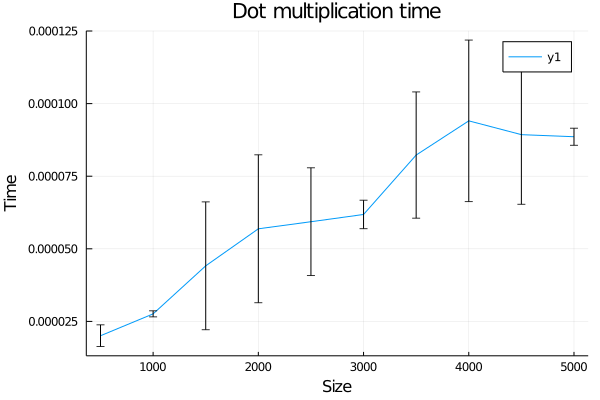

In [157]:
using Plots
std_arr = convert(Array,dot_std.std_time)
p1 = plot(dot_avrg.SIZE, dot_avrg.mean_time, yerr=std_arr, xlabel = "Size", ylabel="Time",title = "Dot multiplication time")

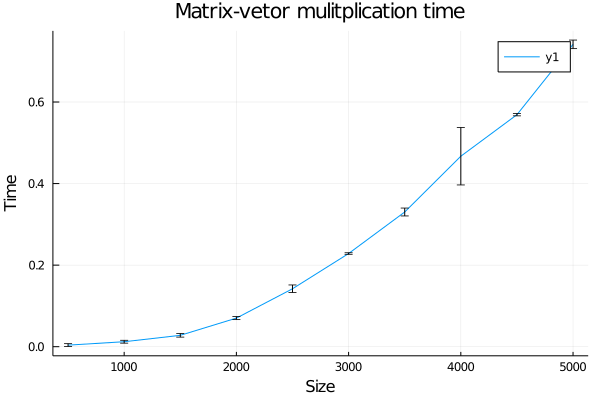

In [158]:
using Plots
std_arr = convert(Array, mv_std.std_time)
p2 = plot(mv_avrg.SIZE, mv_avrg.mean_time, yerr=std_arr, xlabel = "Size", ylabel="Time",title = "Matrix-vetor mulitplication time")

#### Poukladanie wykresow w tabelke

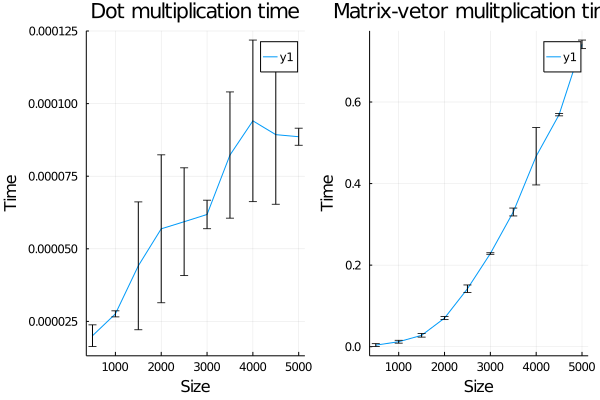

In [159]:
plot(p1, p2, layout=2)